In [234]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [35]:
#import requests
# # fetch data from github
# url = 'https://raw.githubusercontent.com/alvinwilta/Seleksi-2021-Tugas-1/main/Data%20Storing/export/collection.json'
# resp = requests.get(url)
# data = json.loads(resp.text)
# df = pd.DataFrame(data)

In [119]:
import pymongo
# fetch data from local mongodb server
url = "mongodb://localhost:27017/"
client = pymongo.MongoClient(url)
db = client["basdat"]
col = db["jobs"]
data = list(col.find({}))
df1 = pd.DataFrame(list(data))

In [249]:
df = df1
df = df.drop('_id',1)
df = df.fillna(value=np.nan)

In [74]:
df.describe()

,end_sal,exp_min,exp_opt,last_updated,applicant
count,1.610000e+02,223.000000,223.000000,218.000000,240.000000
mean,2.312934e+07,1.780269,3.923767,12.366972,52.566667
std,1.253278e+08,1.322421,2.024294,23.063391,77.849413
min,1.600000e+03,0.000000,1.000000,1.000000,1.000000
25%,8.000000e+06,1.000000,3.000000,2.000000,9.000000
50%,1.200000e+07,1.000000,3.000000,6.000000,24.000000
75%,1.500000e+07,3.000000,5.000000,17.000000,61.500000
max,1.600000e+09,5.000000,10.000000,270.000000,576.000000


In [220]:
df.dtypes

title            object
company          object
location         object
currency         object
start_sal       float64
end_sal         float64
exp_min         float64
exp_opt         float64
last_updated    float64
applicant         int64
dtype: object

In [252]:
# clean up start_sal value that still have "."
df["start_sal"] = df["start_sal"].apply(lambda x: str(x).replace(".", ""))
df['start_sal'] = df['start_sal'].apply(lambda x: x.strip())
df.replace('nan',np.nan)
df['start_sal'] = df['start_sal'].astype(float)

In [255]:
df.head()

,title,company,location,currency,start_sal,end_sal,exp_min,exp_opt,last_updated,applicant
0,Solution Architect,mHealthBank,Jakarta,SGD,25000000.0,35000000.0,5.0,10.0,270.0,123
1,Flutter Developer,Pt Digital Agensi Nusantara,Bandung,IDR,3000000.0,5000000.0,NaN,NaN,9.0,16
2,Software Development Engineer I - Backend,Hzn,Tangerang,IDR,7000000.0,12000000.0,1.0,3.0,6.0,3
3,Network Engineer,Pt Cogworx Business Performance Consulting,Tangerang,IDR,10000000.0,NaN,3.0,5.0,2.0,51
4,Software Tester,Ninja Xpress,Jakarta,NaN,NaN,NaN,3.0,5.0,20.0,27


In [254]:
df = df.drop(df[df.start_sal < 100000].index)
df = df.drop(df[df.end_sal < 100000].index)

In [248]:
df.loc[df['title'].str.contains("Intern", case=False)]

,title,company,location,currency,start_sal,end_sal,exp_min,exp_opt,last_updated,applicant
11,Software Developer Intern,XCIDIC,Jakarta,NaN,NaN,NaN,0.0,1.0,1.0,43
33,IT Intern (Programmer),Pt Linov Roket Prestasi,"Tebet, Jakarta",NaN,NaN,NaN,0.0,1.0,1.0,68
46,Internship Technical Writer Engineer,PT NUSA INTI SATU ARTHA (DOKU),Jakarta,NaN,NaN,NaN,0.0,1.0,2.0,42
84,Database Developer Intern,AIA Singapore Pte Ltd,Batam,NaN,NaN,NaN,0.0,1.0,4.0,105
110,Software Engineer Intern,OKANEMO,Jakarta,NaN,NaN,NaN,NaN,NaN,NaN,57
114,Frontend Developer Intern,Pt. Bukit Vista Nusantara,Jimbaran,NaN,NaN,NaN,0.0,1.0,2.0,77
158,Front-End Developer - Intern,Takalab,"Mampang Prapatan, Jakarta",IDR,3000000.0,3200000.0,NaN,NaN,1.0,42
206,Software QA Test Intern,PT. Folarium Innotek Indonesia,Jakarta,NaN,NaN,NaN,0.0,1.0,NaN,141
232,Internship Web Programmer,Pt Sinergi Inti Berkah Investama,Surabaya,IDR,600000.0,2000000.0,0.0,1.0,2.0,73
238,Backend Engineer Intern,Pt Super Giga Generasi,"Kembangan, Jakarta",IDR,2000000.0,2500000.0,0.0,1.0,2.0,233


In [78]:
df['start_sal'].unique()

array([25000000, 3000000, 7000000, '10.000.000', None, 1234, 6000000,
       6500000, 4500000, 0, 8000000, 2750000, 12000000, 5000000, 10000000,
       4000000, 20000000, 15000000, 7500000, 9000000, 2500000, 17000000,
       5500000, 1300000000, 3500000, 40000000, 1000, 600000, 1500000,
       2000000], dtype=object)

<AxesSubplot:>

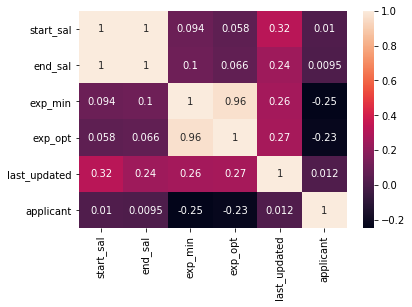

In [256]:
sns.heatmap(df[df.columns[1:]].corr(), annot=True)

Dari heatmap diatas didapati bahwa:
1. start_sal dan end_sal berkorelasi positif karena memang end_sal selalu lebih besar dibandingkan start_sal
2. exp_min dan exp_opt berkorelasi positif karena memang exp_max selalu lebih besar dibandingkan exp_min dan tidak bernilai 1 karena terdapat data yang tidak memiliki exp_opt
3. Didapati bahwa data lainnya tidak berkorelasi tinggi dengan salary ataupun experience, khususnya applicant yang berarti tidak tentu salary tinggi akan memunculkan applicant yang tinggi juga, dan salary tinggi tidak tentu mengharuskan pengalaman yang banyak juga

In [261]:
diff_sal = pd.DataFrame(df['end_sal']-df['start_sal'])
diff_sal

,0
0,10000000.0
1,2000000.0
2,5000000.0
3,NaN
4,NaN
...,...
235,350000.0
236,7000000.0
237,6500000.0
238,500000.0


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

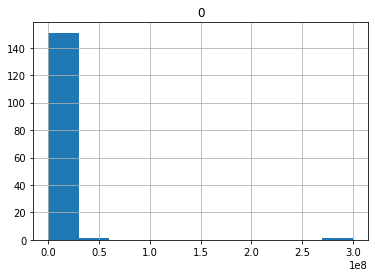

In [262]:
diff_sal.dropna().hist(bins=10)

In [264]:
df

,title,company,location,currency,start_sal,end_sal,exp_min,exp_opt,last_updated,applicant
0,Solution Architect,mHealthBank,Jakarta,SGD,25000000.0,35000000.0,5.0,10.0,270.0,123
1,Flutter Developer,Pt Digital Agensi Nusantara,Bandung,IDR,3000000.0,5000000.0,NaN,NaN,9.0,16
2,Software Development Engineer I - Backend,Hzn,Tangerang,IDR,7000000.0,12000000.0,1.0,3.0,6.0,3
3,Network Engineer,Pt Cogworx Business Performance Consulting,Tangerang,IDR,10000000.0,NaN,3.0,5.0,2.0,51
4,Software Tester,Ninja Xpress,Jakarta,NaN,NaN,NaN,3.0,5.0,20.0,27
...,...,...,...,...,...,...,...,...,...,...
235,QA Engineer,Piksel Digital Media,Jember,IDR,1500000.0,1850000.0,NaN,NaN,18.0,9
236,PROGRAMMER-FULL TIME (MEDAN),Justnile Sea Pte Ltd,Medan,IDR,3000000.0,10000000.0,1.0,3.0,1.0,63
237,Front End Developer,Pt Platinumetrix Global Inovasi,Jakarta,IDR,6500000.0,13000000.0,1.0,3.0,2.0,67
238,Backend Engineer Intern,Pt Super Giga Generasi,"Kembangan, Jakarta",IDR,2000000.0,2500000.0,0.0,1.0,2.0,233
